# Introduction
This notebook benchmarks different portfolio construction methods using Python.

We start by importing the required libraries.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.environ['XPAUTH_PATH'] = 'xpauth.xpr'

## Data Loading
Here we define the input data path and parameters for the benchmark.

In [2]:
# Define dataset path and configuration
data_path = '/Users/gio/Documents/VsCode/FICO_case_HTW2025'
data_size = '100'
cleaned = True

if cleaned == True:
    clean = '_cleaned'
else:
    clean = ''

df_info = pd.read_csv(f'{data_path}/data{data_size}/shares{data_size}{clean}.csv')
df_info = df_info.T
df_info.columns = df_info.iloc[0]
df_info = df_info.drop(df_info.index[0])

df_price = pd.read_csv(f'{data_path}/data{data_size}/stockprices{data_size}{clean}.csv')
df_price = df_price.T
df_price.columns = df_price.iloc[0]
df_price = df_price.drop(df_price.index[0])
df_price = df_price.reset_index(drop=True)

display(df_info)
display(df_price)

Stock,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_91,Stock_92,Stock_93,Stock_94,Stock_95,Stock_96,Stock_97,Stock_98,Stock_99,Stock_100
Return,0.1598,0.2018,0.0883,0.2048,0.0818,0.0676,0.1445,0.0265,0.0196,0.0774,...,0.1438,-0.015,0.1166,-0.0963,0.0792,0.0687,0.115,0.0552,0.077,0.0517
Sector,Healthcare,Technology,Consumer Goods,Finance,Finance,Energy,Healthcare,Healthcare,Real Estate,Technology,...,Energy,Industrials,Healthcare,Technology,Healthcare,Energy,Energy,Real Estate,Healthcare,Real Estate
ESG score,73.0,95.0,63.0,68.0,65.0,43.0,52.0,68.0,58.0,66.0,...,37.0,52.0,84.0,79.0,57.0,63.0,31.0,59.0,77.0,44.0


Stock,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_91,Stock_92,Stock_93,Stock_94,Stock_95,Stock_96,Stock_97,Stock_98,Stock_99,Stock_100
0,25.4,71.93,71.17,30.41,114.56,22.94,62.75,76.51,43.0,224.95,...,28.45,43.18,33.2,62.34,20.15,34.53,114.84,85.75,111.42,11.24
1,39.08,77.11,51.04,65.3,79.68,24.37,50.6,67.11,27.12,252.19,...,23.84,36.11,18.75,15.83,15.75,42.0,146.96,25.38,92.15,4.26
2,42.69,76.09,51.68,61.17,79.84,23.84,47.03,65.76,27.52,228.44,...,24.54,37.54,18.37,16.07,15.96,44.25,156.32,27.0,87.99,4.71
3,63.4,27.89,61.31,87.41,67.46,28.26,36.55,62.81,18.47,209.76,...,25.95,35.76,18.29,11.58,16.57,47.07,180.06,19.86,67.9,4.15
4,63.89,26.35,59.67,90.1,66.45,27.39,40.53,61.0,15.41,219.12,...,25.29,35.64,17.67,11.89,15.08,45.93,180.91,17.34,65.84,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,1.26,1.02,36.29,3.05,1.37,3.94,1.35,16.89,1.0,6.64,...,1.26,1.09,7.4,1.12,1.21,5.49,438.63,1.44,1.51,1.0
4086,1.38,1.21,36.54,3.33,1.4,3.94,1.46,16.36,1.0,5.17,...,1.26,1.0,8.2,1.33,1.16,5.35,433.7,1.38,1.5,1.12
4087,1.35,1.07,36.58,2.82,1.43,3.94,1.5,15.94,1.0,5.2,...,1.4,1.01,7.75,1.22,1.19,5.31,430.45,1.4,1.71,1.03
4088,1.48,1.23,38.14,2.91,1.38,3.68,1.38,15.48,1.0,5.19,...,1.4,1.0,7.95,1.25,1.19,5.12,452.31,1.47,1.67,1.01


## Equally Weighted Portfolio
We construct a simple portfolio where all assets receive the same weight.

Portfolio weights: Stock
Stock_1      0.010417
Stock_2      0.010417
Stock_3      0.010417
Stock_4      0.010417
Stock_5      0.010417
               ...   
Stock_96     0.010417
Stock_97     0.010417
Stock_98     0.010417
Stock_99     0.010417
Stock_100    0.010417
Length: 96, dtype: float64
Cumulative Return: 20266.625886369366
Annualized Return: 0.8425654413188641
Annualized Volatility: 0.13458190618744453
Sharpe Ratio: 6.260614559473888


/var/folders/fl/1s1wnwy56_d0004pjtmfwr280000gn/T/ipykernel_2731/3745374532.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  returns = df_price.pct_change().dropna()


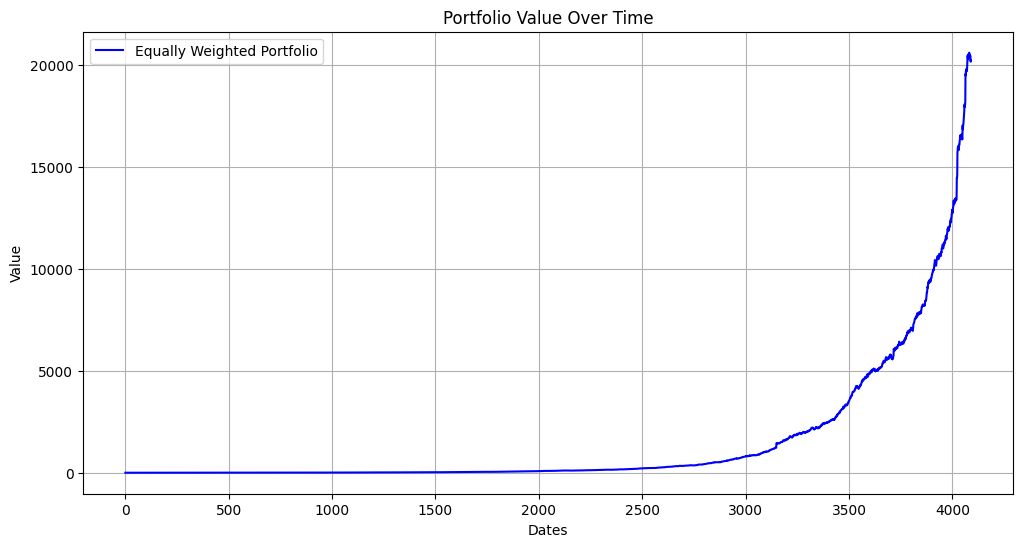

In [3]:
# Building equally weighted portfolio
weights = pd.Series(1 / len(df_price.columns), index=df_price.columns)

# Dayly returns
returns = df_price.pct_change().dropna()

# Dayly returns 
portfolio_returns = returns.dot(weights)

# Cumulative returns
portfolio_value = (1 + portfolio_returns).cumprod()

# Main statistics
cumulative_return = portfolio_value.iloc[-1] - 1
annualized_return = (portfolio_value.iloc[-1]) ** (252 / len(portfolio_value)) - 1
annualized_volatility = portfolio_returns.std() * (252 ** 0.5)
sharpe_ratio = annualized_return / annualized_volatility

# Display results
print("Portfolio weights:", weights)
print("Cumulative Return:", cumulative_return)
print("Annualized Return:", annualized_return)
print("Annualized Volatility:", annualized_volatility)
print("Sharpe Ratio:", sharpe_ratio)

# Plotting the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Equally Weighted Portfolio', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Dates')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

weights.to_csv(f'Results/Benchmark Portfolios/Equal_Weights.csv')

## Inverse Volatility Weighted Portfolio
Weights are assigned inversely proportional to the volatility of each asset.

Portfolio weights: Stock
Stock_1      0.007025
Stock_2      0.003834
Stock_3      0.014759
Stock_4      0.007213
Stock_5      0.012416
               ...   
Stock_96     0.016532
Stock_97     0.013159
Stock_98     0.004596
Stock_99     0.010450
Stock_100    0.004692
Length: 96, dtype: float64
Cumulative Return: 319.8520796120127
Annualized Return: 0.4271198959799427
Annualized Volatility: 0.09255848193334604
Sharpe Ratio: 4.614594870813933


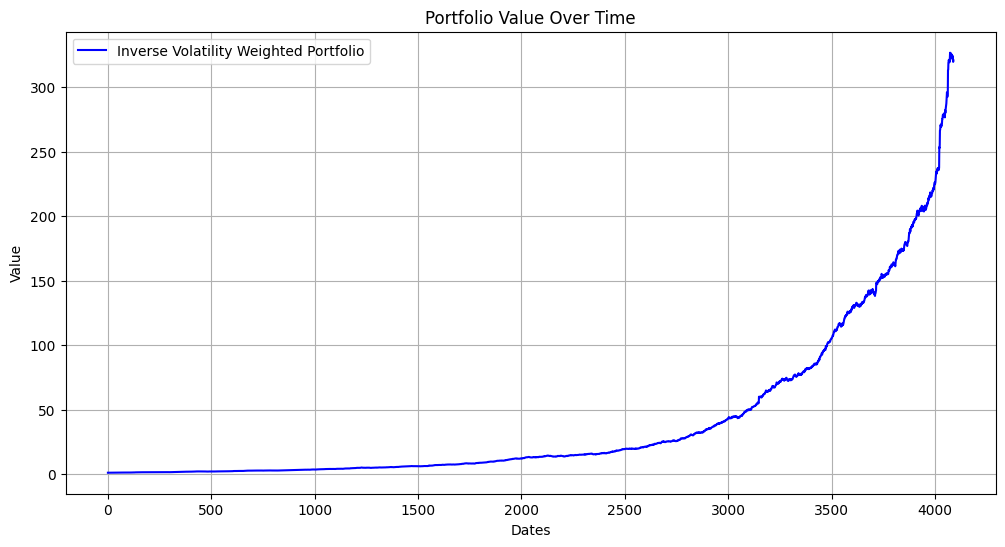

In [4]:
# Compute volatility (annualized)
volatility = returns.std() * (252 ** 0.5)

# Inverse volatility weights
inv_vol_weights = 1 / volatility

# Normalize weights to sum to 1
weights = inv_vol_weights / inv_vol_weights.sum()

# Daily portfolio return 
portfolio_returns = returns.dot(weights)

# cumulative returns
portfolio_value = (1 + portfolio_returns).cumprod()

# Main statistics
cumulative_return = portfolio_value.iloc[-1] - 1
annualized_return = (portfolio_value.iloc[-1]) ** (252 / len(portfolio_value)) - 1
annualized_volatility = portfolio_returns.std() * (252 ** 0.5)
sharpe_ratio = annualized_return / annualized_volatility

# Display results
print("Portfolio weights:", weights)
print("Cumulative Return:", cumulative_return)
print("Annualized Return:", annualized_return)
print("Annualized Volatility:", annualized_volatility)
print("Sharpe Ratio:", sharpe_ratio)

# Plotting the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Inverse Volatility Weighted Portfolio', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Dates')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

weights.to_csv(f'Results/Benchmark Portfolios/Inverse_Volatility_Weights.csv')